In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('FinalYearProject\data\a_heart.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (ipython-input-1479971093.py, line 1)

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,1,1,110,235,0,1,153,0,0.000000,2,0,2,1
1,59,1,3,160,273,0,0,125,0,0.000000,2,0,2,0
2,58,1,0,128,259,0,0,130,1,3.000000,1,2,3,0
3,67,0,0,176,239,1,1,164,1,1.192437,1,2,3,0
4,63,0,1,140,195,0,1,179,0,0.000000,2,2,2,1
5,42,1,2,126,244,0,1,187,1,-0.084839,2,0,2,1
6,58,1,1,120,284,0,0,160,0,1.800000,1,0,2,0
7,54,1,2,125,273,0,0,152,0,0.500000,0,1,2,1
8,40,1,3,140,199,0,1,178,1,1.400000,2,0,3,1
9,52,1,0,121,270,0,0,117,1,2.098738,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3162 non-null   int64  
 1   sex       3162 non-null   int64  
 2   cp        3162 non-null   int64  
 3   trestbps  3162 non-null   int64  
 4   chol      3162 non-null   int64  
 5   fbs       3162 non-null   int64  
 6   restecg   3162 non-null   int64  
 7   thalach   3162 non-null   int64  
 8   exang     3162 non-null   int64  
 9   oldpeak   3162 non-null   float64
 10  slope     3162 non-null   int64  
 11  ca        3162 non-null   int64  
 12  thal      3162 non-null   int64  
 13  target    3162 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 346.0 KB


In [ ]:
df.shape

(3162, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Feature Distributions

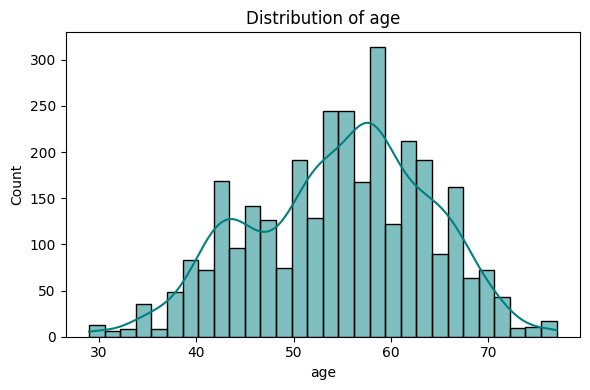

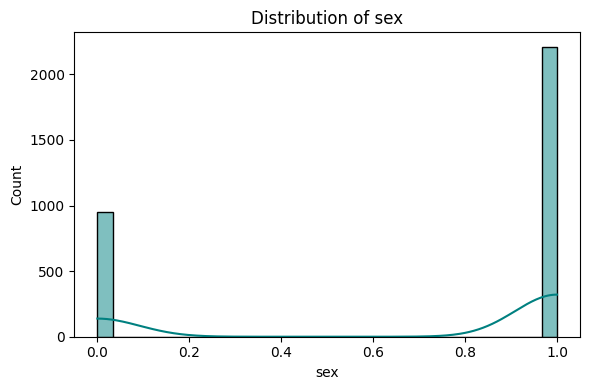

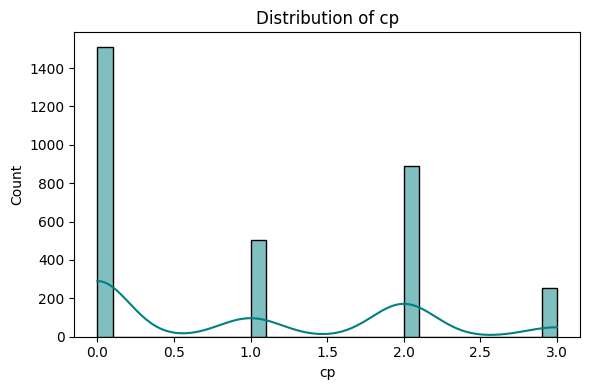

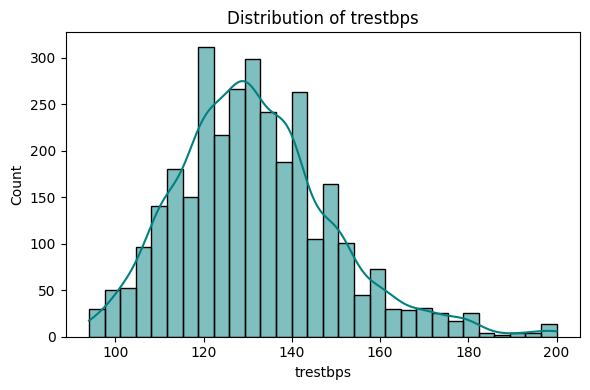

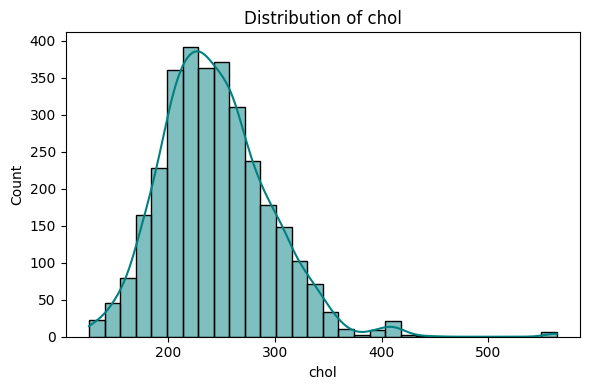

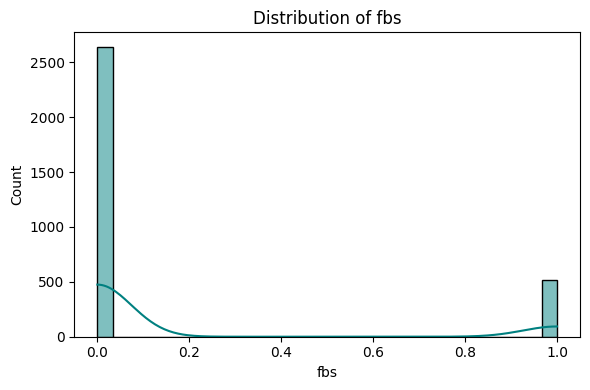

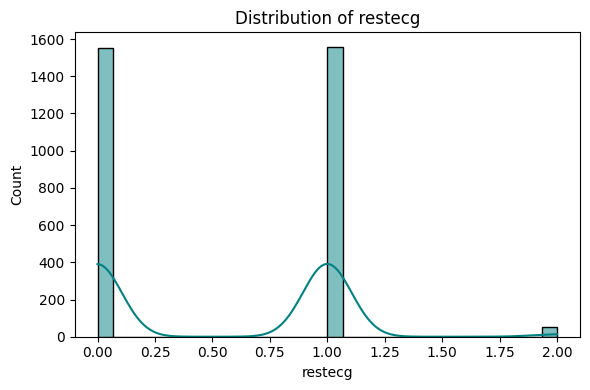

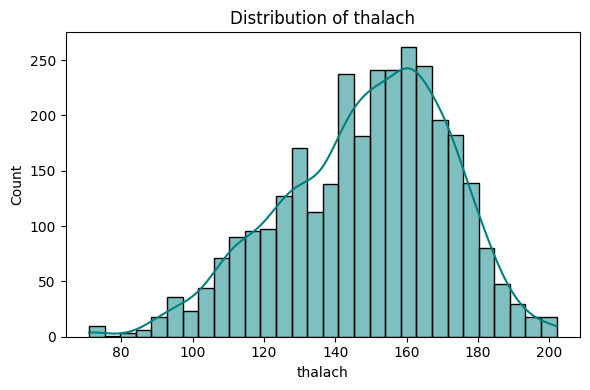

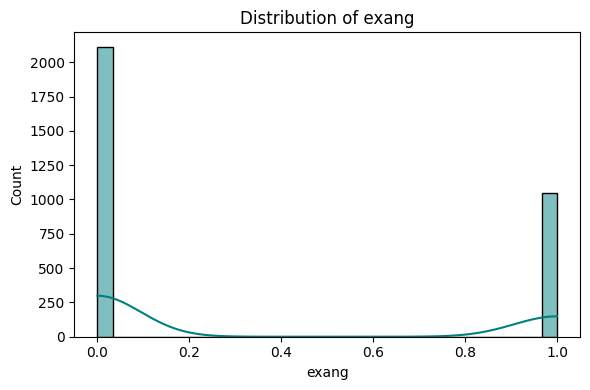

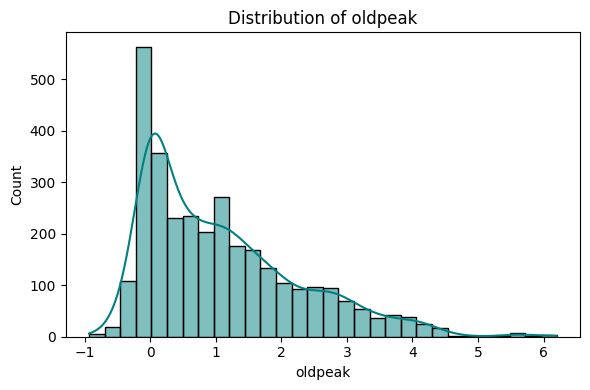

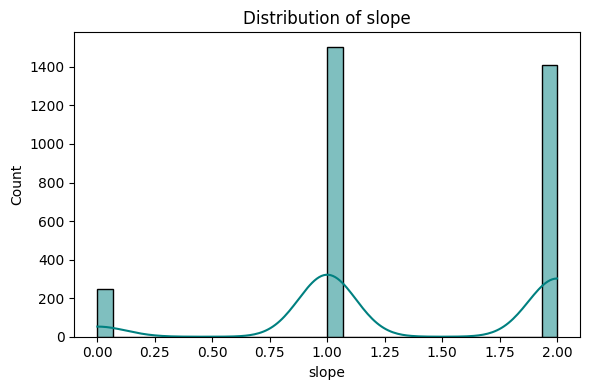

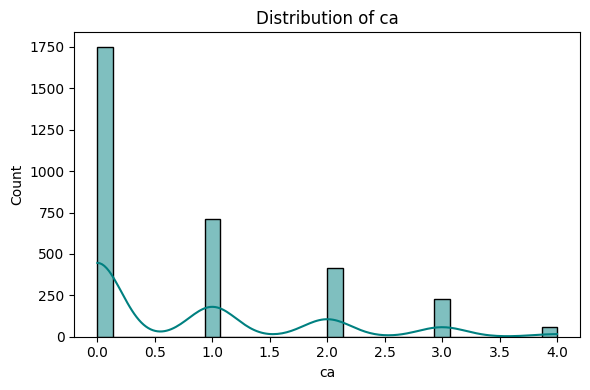

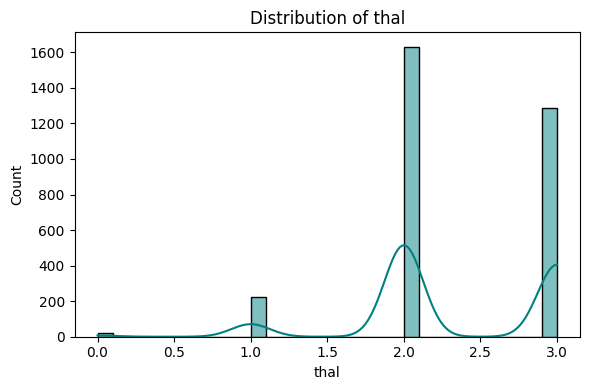

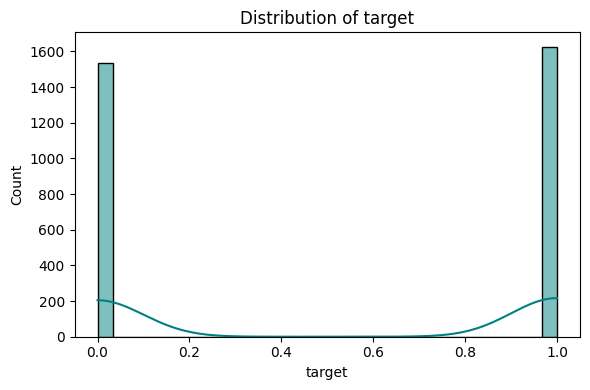

In [ ]:
# print("Feature Distributions: ")
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.tight_layout()
    plt.show()

### target variable analysis

In [ ]:
import plotly.express as px
target_counts = df['target'].value_counts()
fig = px.bar(target_counts,
             x=target_counts.index,
             y=target_counts.values,
             labels={'x': 'Target', 'y': 'Count'},
             title='Target Variable Distribution')
fig.show()

In [ ]:
target_correlation = df.corr()['target'].sort_values(ascending=False)
display(target_correlation.to_frame(name='Correlation with Target'))

,Correlation with Target
target,1.000000
cp,0.413543
thalach,0.378198
slope,0.339543
restecg,0.133991
fbs,-0.036531
chol,-0.118492
trestbps,-0.130833
age,-0.200943
sex,-0.299954


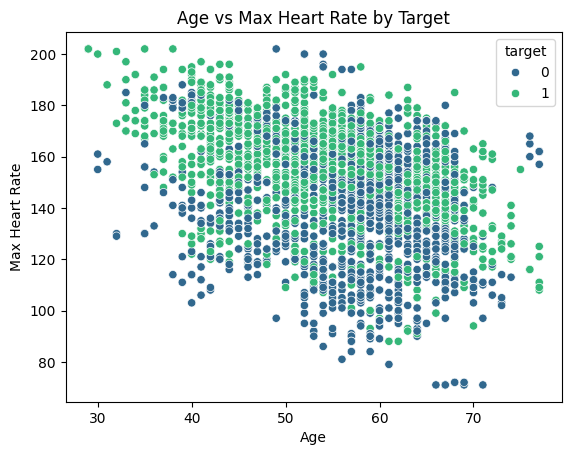

In [ ]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='viridis')
plt.title('Age vs Max Heart Rate by Target')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

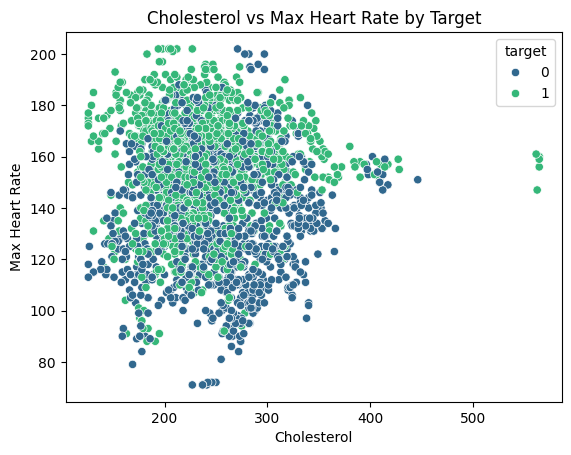

In [ ]:
sns.scatterplot(data=df, x='chol', y='thalach', hue='target', palette='viridis')
plt.title('Cholesterol vs Max Heart Rate by Target')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.show()

Text(0, 0.5, 'Max Heart Rate')

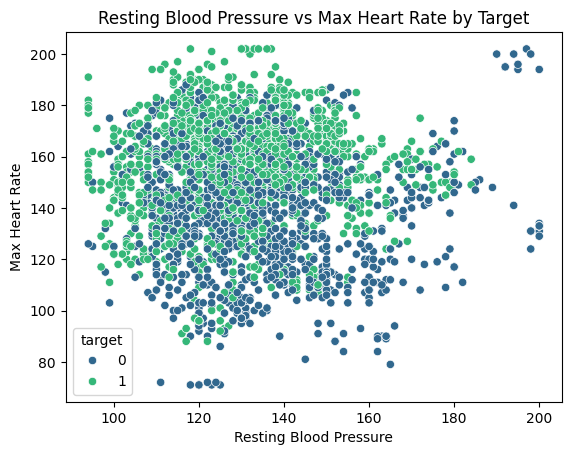

In [ ]:
sns.scatterplot(data=df, x='trestbps', y='thalach', hue='target', palette='viridis')
plt.title('Resting Blood Pressure vs Max Heart Rate by Target')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max Heart Rate')

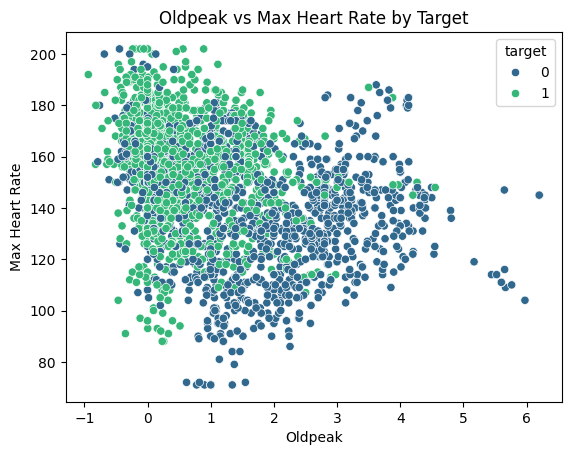

In [ ]:
sns.scatterplot(data=df, x='oldpeak', y='thalach', hue='target', palette='viridis')
plt.title('Oldpeak vs Max Heart Rate by Target')
plt.xlabel('Oldpeak')
plt.ylabel('Max Heart Rate')
plt.show()

<Axes: xlabel='target', ylabel='age'>

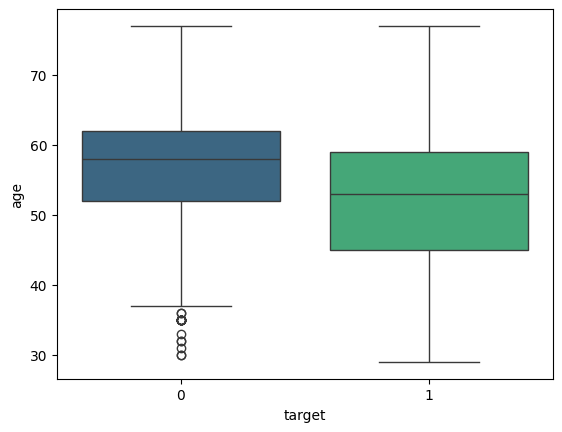

In [ ]:
sns.boxplot(data=df, x='target', y='age', palette='viridis')

In [ ]:
fig = px.pie(
    df,
    names='target',
    title='Distribution of Target Variable',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()


### correlation

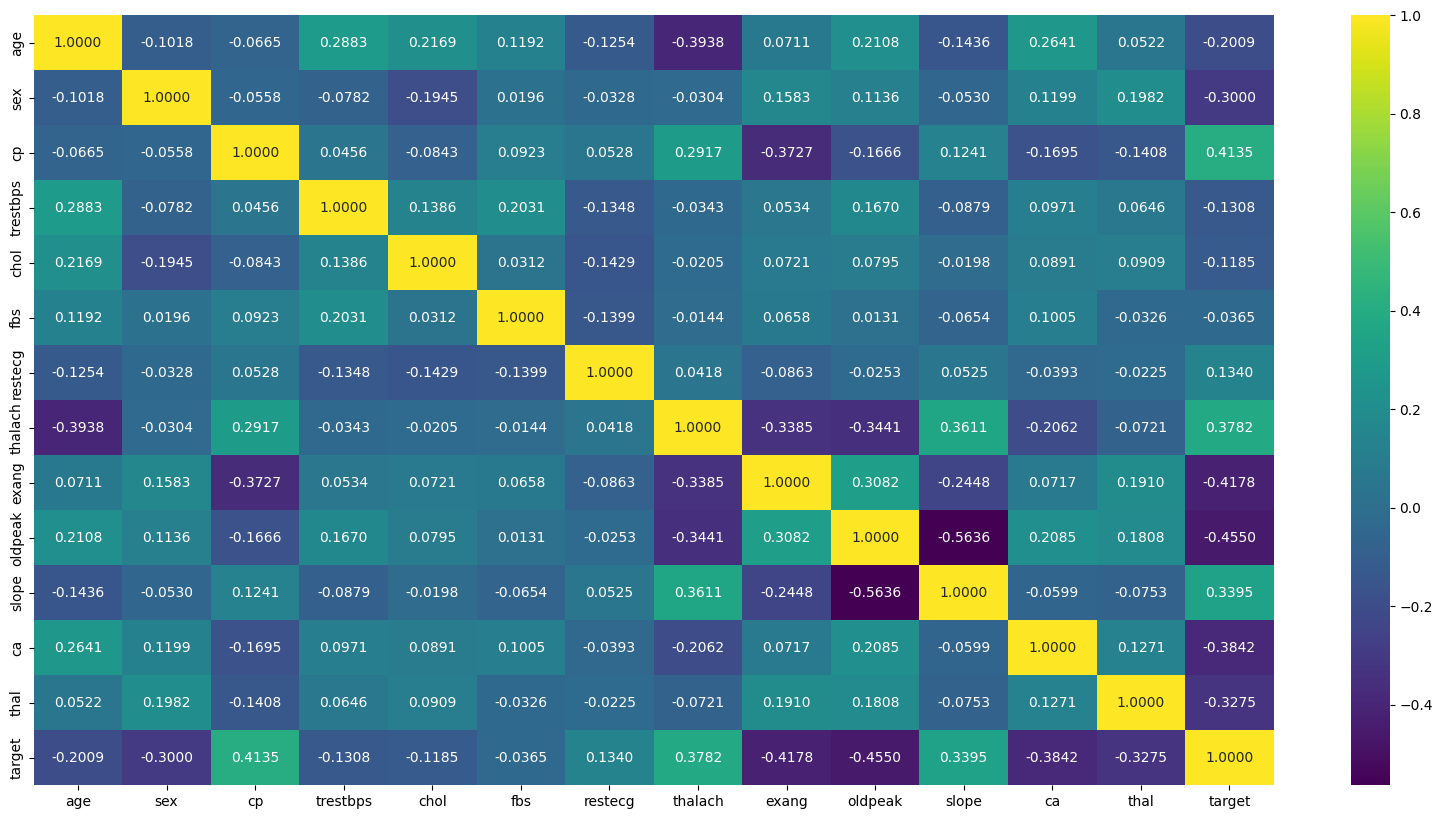

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.4f',cbar=True,cmap='viridis')
plt.show()


In [ ]:
fig = px.scatter(df, x='age', y='thalach', color='target',
                 title='Age vs Max Heart Rate by Target', opacity=0.7)
fig.show()

In [ ]:
fig = px.histogram(df, x='chol', color='target', nbins=30, barmode='overlay',
                   title='Cholesterol Distribution by Target')
fig.show()

In [ ]:
fig = px.box(df, x='target', y='age', color='target',
             title='Age by Target')
fig.show()

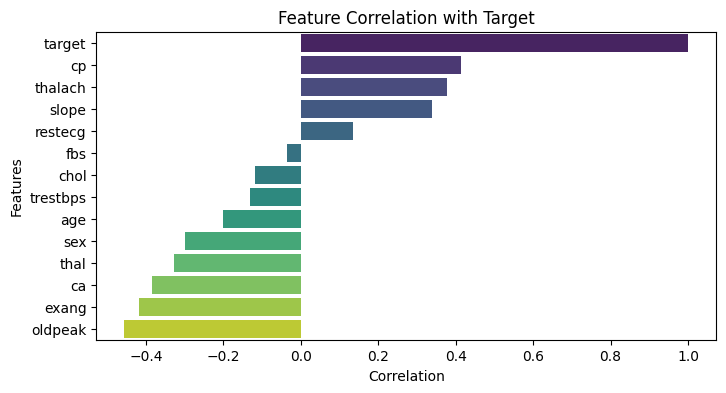

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.title("Feature Correlation with Target", fontsize=12)
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

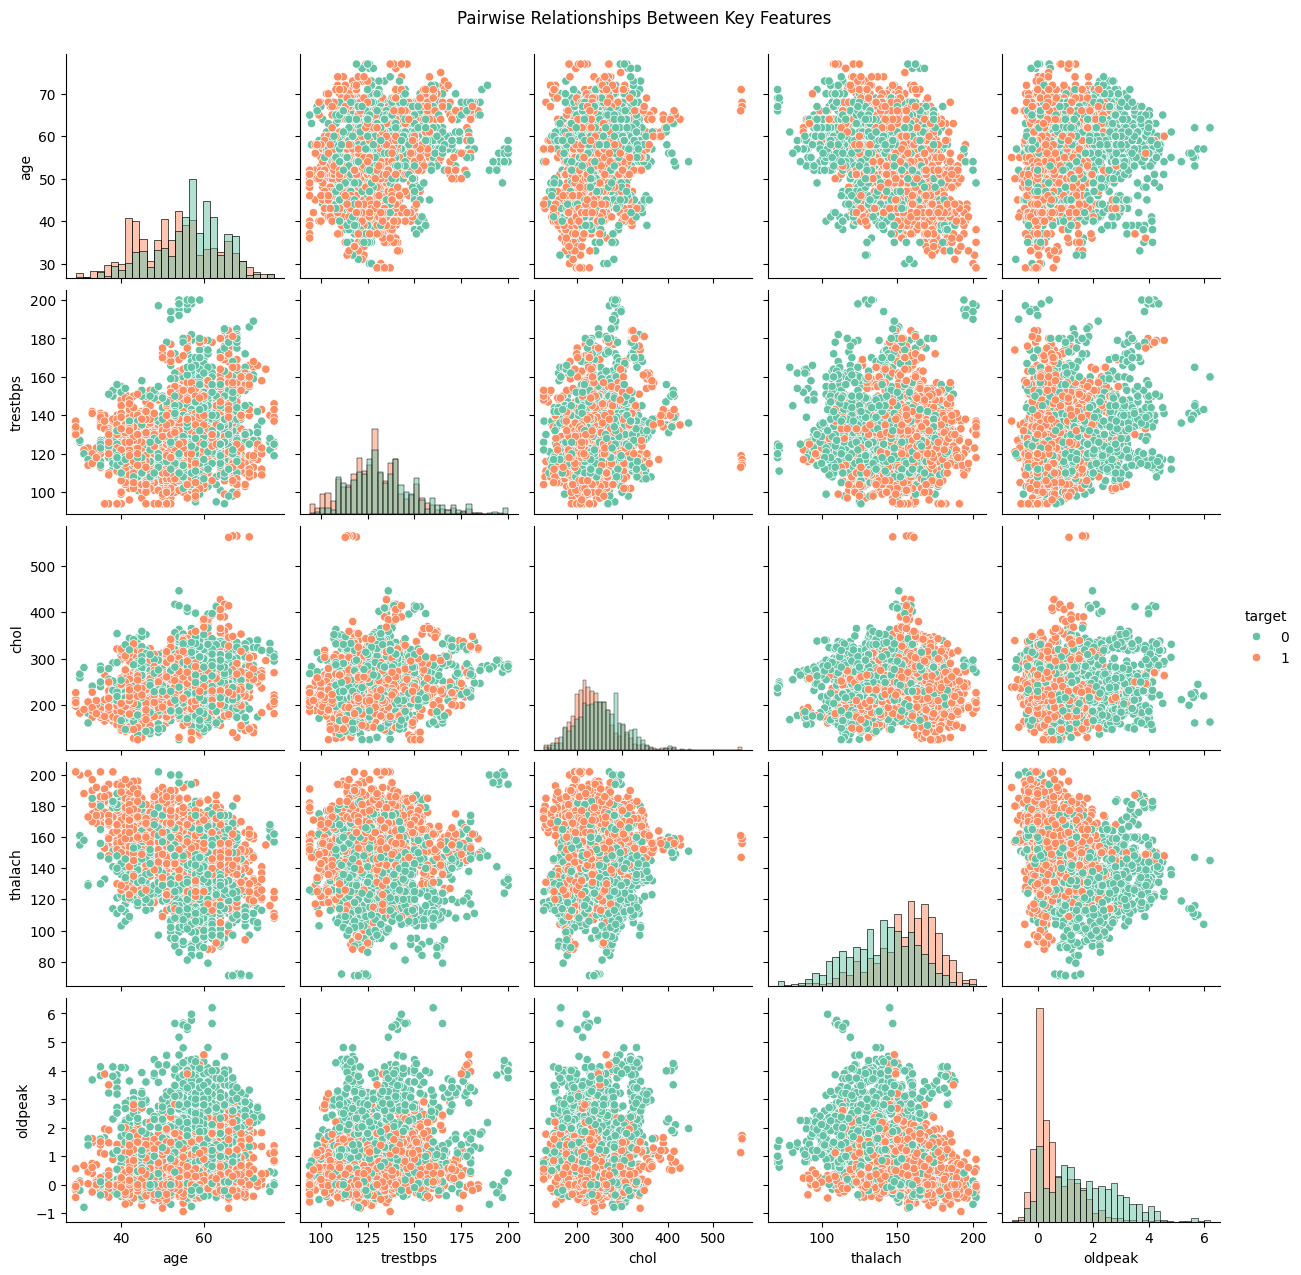

In [ ]:
top_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[top_features], hue='target', diag_kind='hist', palette='Set2')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()

In [ ]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_features:
    fig = px.histogram(df, x=col, color='target', barmode='group',
                       title=f"{col} Distribution by Target")
    fig.show()

In [ ]:
for col in ['age', 'chol', 'thalach', 'oldpeak']:
    fig = px.violin(df, x='target', y=col, color='target', box=True, points="all",
                    title=f"Distribution of {col} by Target")
    fig.show()

Text(0, 0.5, 'Count')

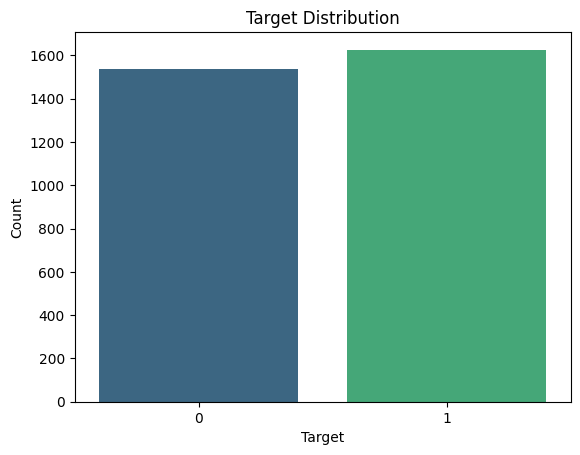

In [ ]:
sns.countplot(data=df, x='target', palette='viridis')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

<Axes: xlabel='age'>

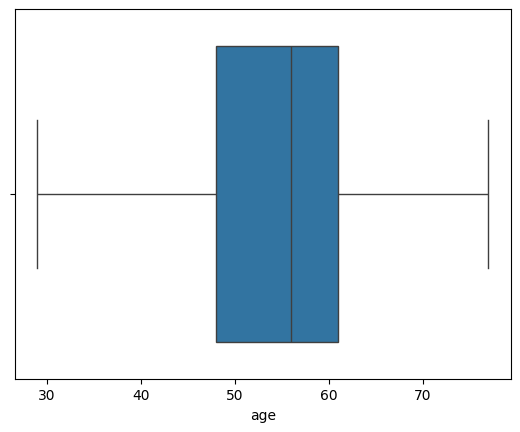

In [ ]:
sns.boxplot(x='age',data=df)

In [ ]:
min(df['age'])

29

In [ ]:
max(df['age'
])

77

In [ ]:
df['age'].median()

56.0